In [176]:
import pandas as pd


Loading the dataset and checking the head.

In [177]:
df = pd.read_csv('Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Checking for duplicates and missing values**

First checking for missing values:

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [179]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


There is no missing values in the dataset. Next checking for any duplicate data:

In [180]:
df.duplicated().sum()

0

There is no duplicate data.

## **Checking for distribution of target feature**

In this dataset, our target feature is 'churn'

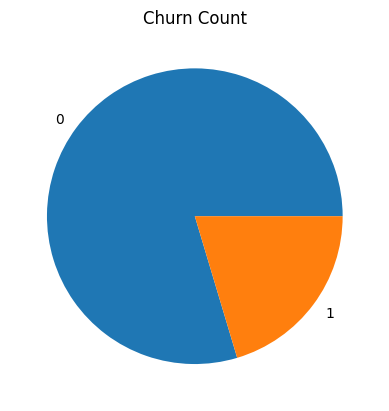

In [181]:
df["churn"].value_counts(normalize=True).plot(kind='pie')
plt.title("Churn Count")
plt.ylabel("")
plt.show()

In [182]:
df["churn"].value_counts(normalize=True)

,proportion
churn,
0,0.7963
1,0.2037


## **Checking for statistical summary for the numerical data**

In [183]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##**Checking correlation for numerical features**

We are going to display the correlation matrix, heatmap, and the scatter plot matrix for the numerical features.

In [184]:
numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


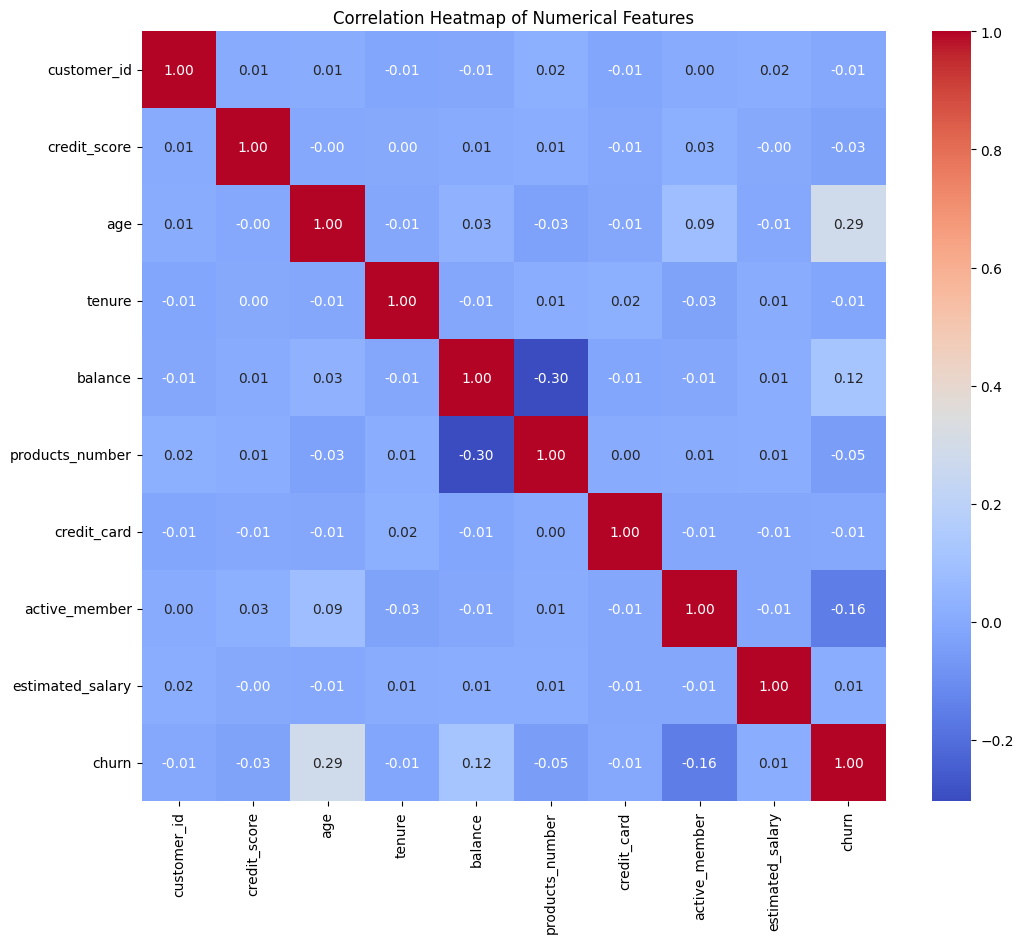

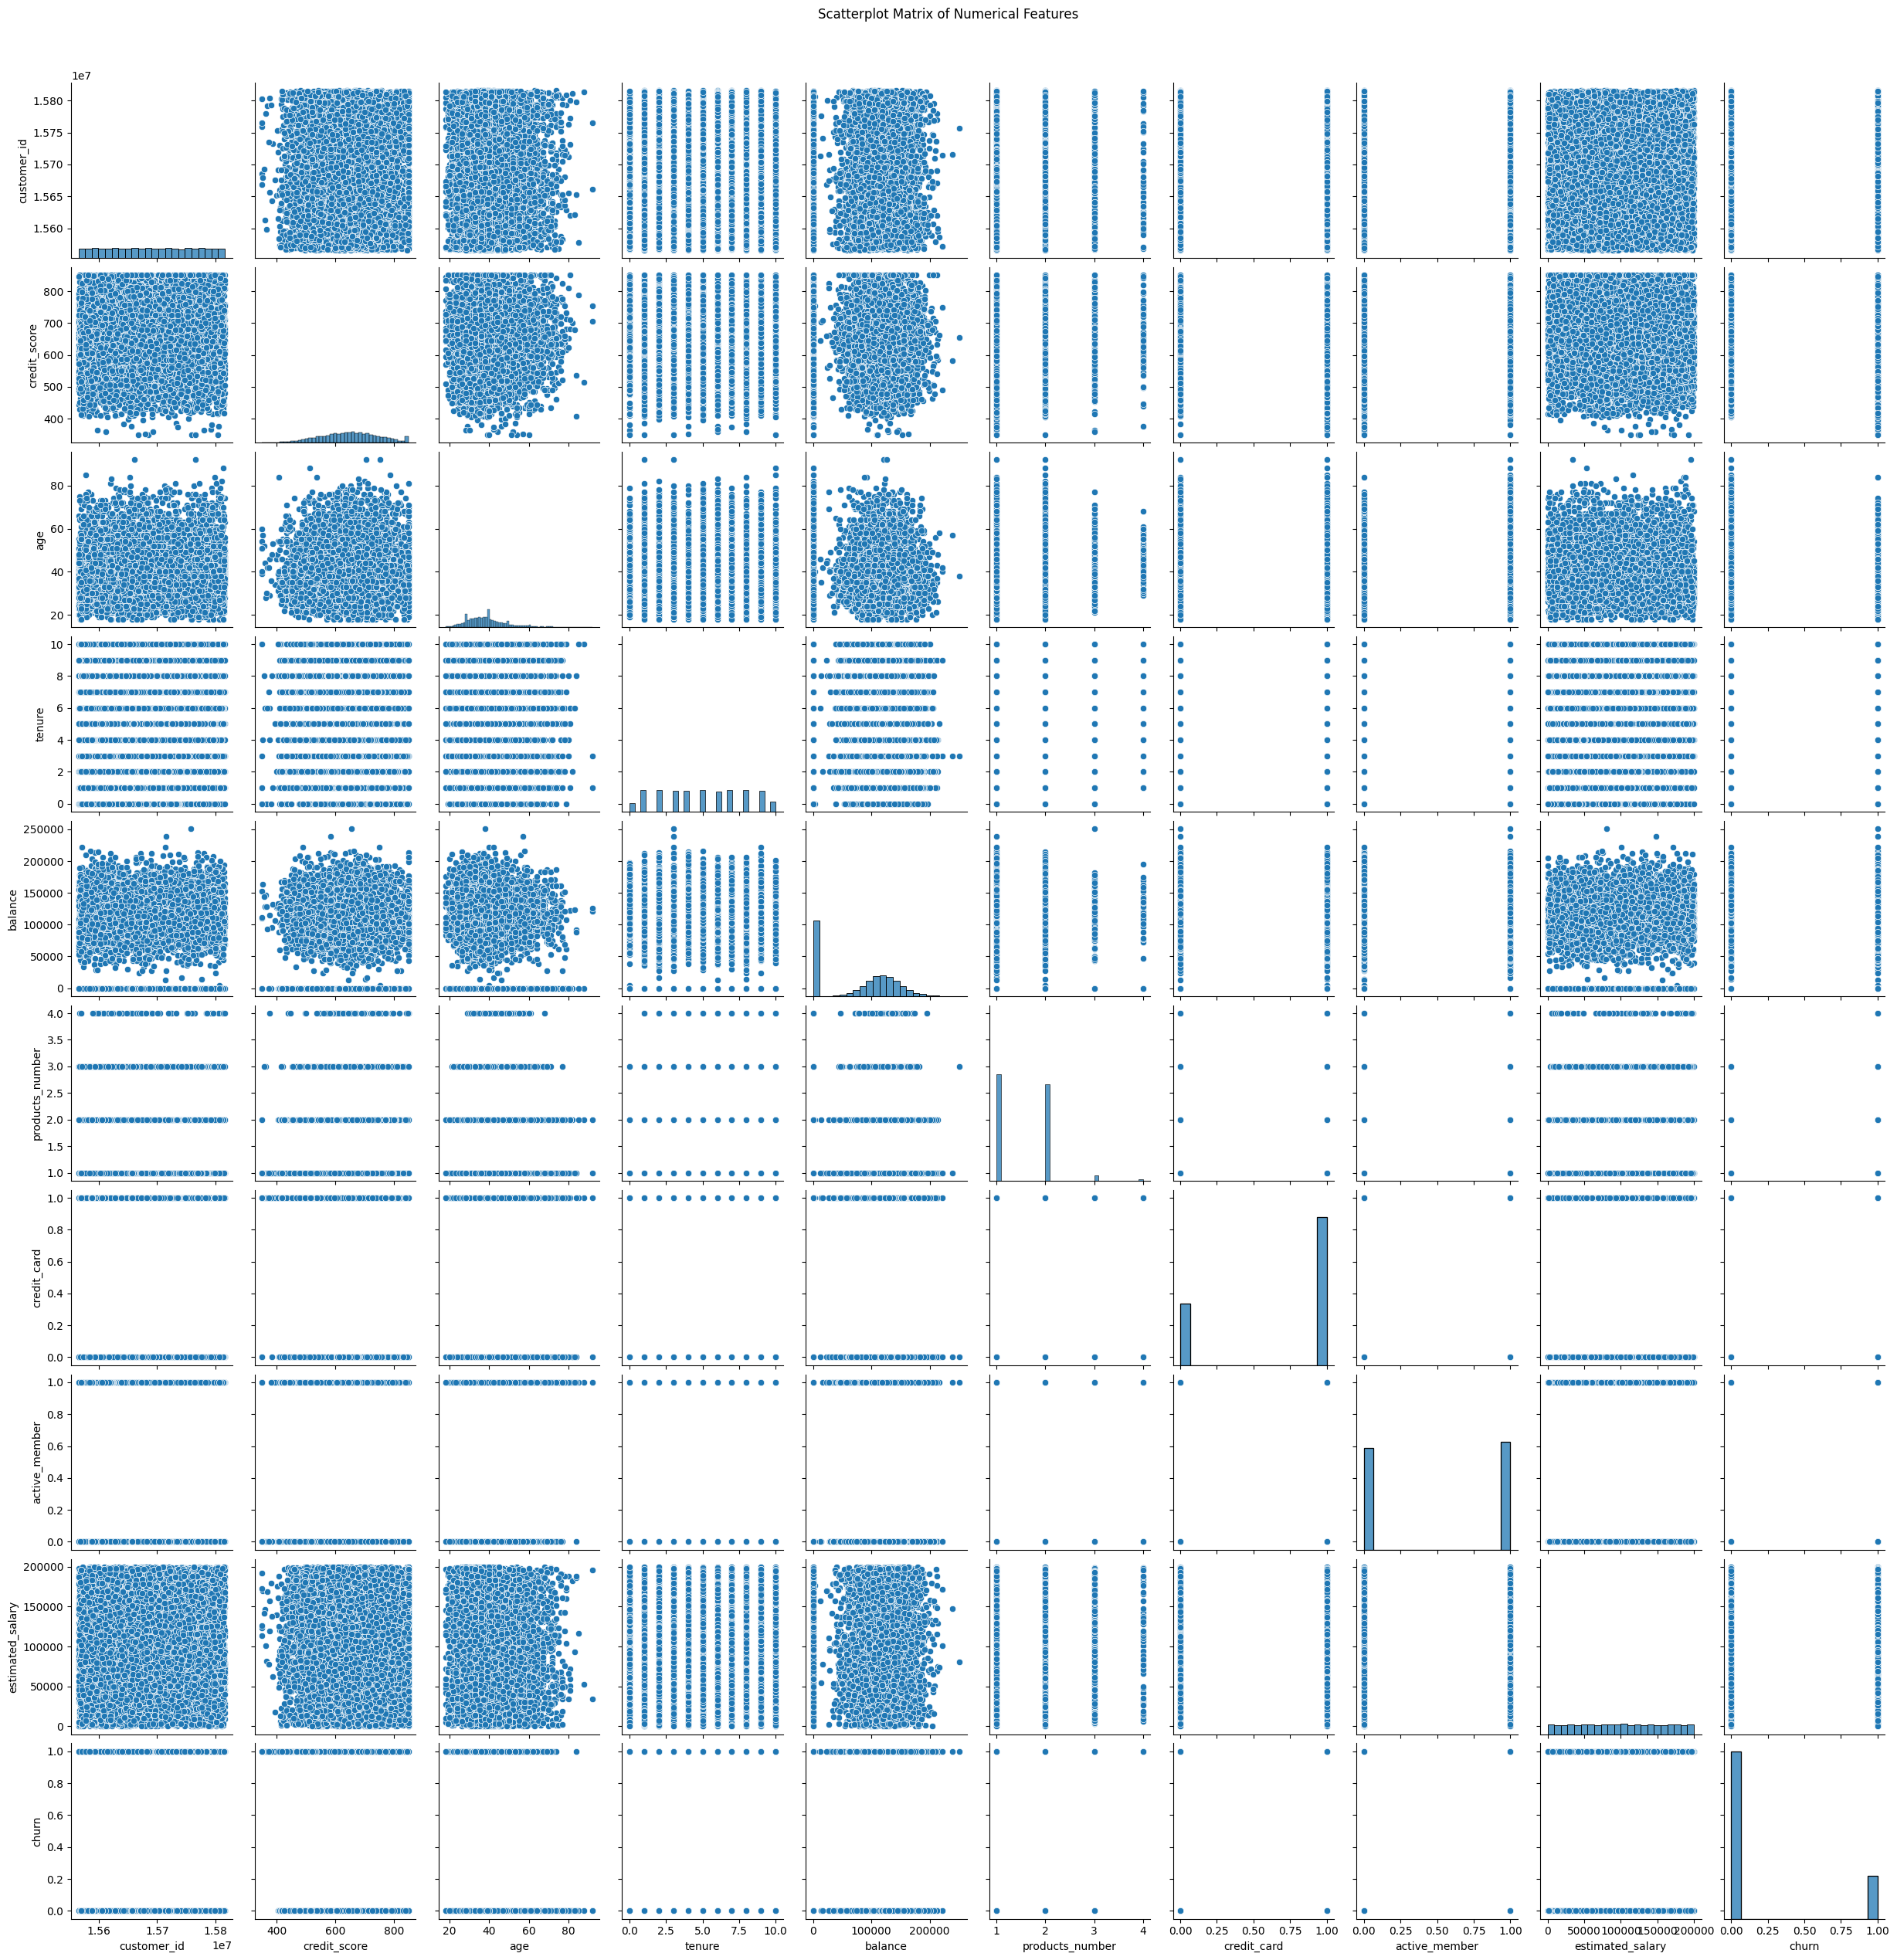

In [185]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

sns.pairplot(numerical_features)
plt.suptitle('Scatterplot Matrix of Numerical Features', y=1.02)
plt.show()

##**Churn status based on gender**

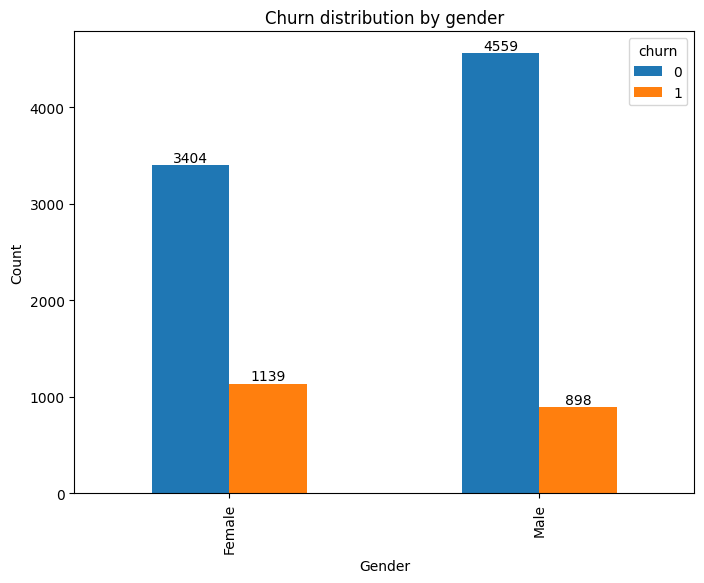

In [186]:
churn_gender = df.groupby(["gender"])["churn"].value_counts().unstack()

churn_gender.plot(kind='bar', figsize=(8, 6))
plt.title('Churn distribution by gender')
plt.xlabel('Gender')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insights from churn vs gender:**

1. Male customers (5,457 total) outnumber female customers (4,543 total)
2. Female customers (25.1%) are churning at a significantly higher rate than male customers (16.5%) by 8.6 percentage points higher.

**Business implications:**

1. There appears to be a gender-based disparity in customer retention
2. There are areas to explore such as if there are different product features that better serve male customers.
3. Can there be better marketing strategies aimed towards female?


##**Churn status based on country**

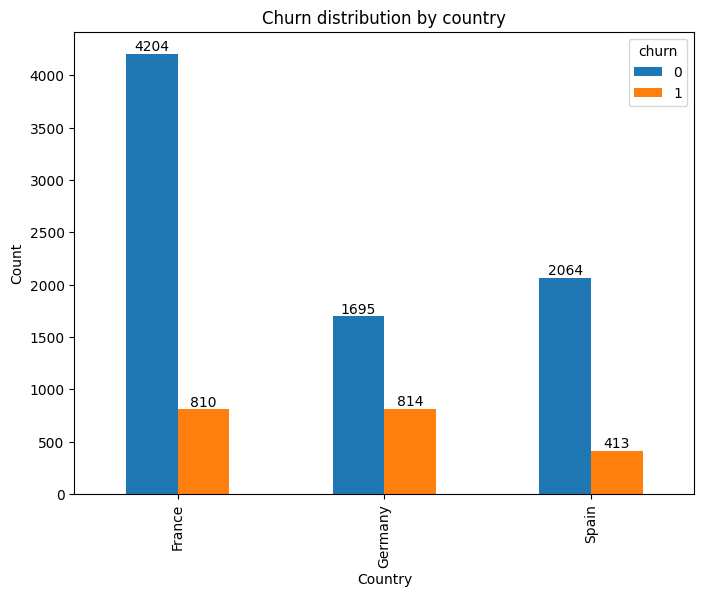

In [187]:
churn_country = df.groupby(["country"])["churn"].value_counts().unstack()

churn_country.plot(kind='bar', figsize=(8, 6))
plt.title('Churn distribution by country')
plt.xlabel('Country')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

**Insights from churn vs gender:**

1. France is the largest market base for Bank ABC (5014 total customers). Germany and Spain has similar total number of customers (2,509 vs. 2,477).
2. Germany has the highest churn rate (32.4%) compared to France (16.2%) and Spain (16.7%)

**Business implications:**

1. Focus more on German market due to its high churn rate.
2. Explore retention strategies in Spain and France to be applied in Germany.
3. Other factors? Pricing strategy? Cultural factor?

##**Churn status based on age**

,age
churn,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


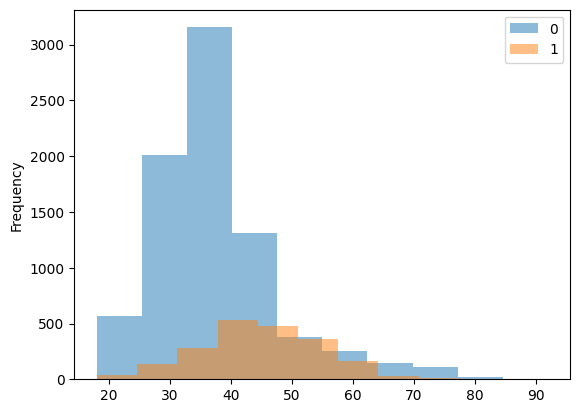

In [188]:
df.groupby('churn')['age'].plot.hist(alpha=0.5, legend=True)

In [189]:
age_summary = df.groupby('churn')['age'].describe()
print(age_summary)

        count       mean        std   min   25%   50%   75%   max
churn                                                            
0      7963.0  37.408389  10.125363  18.0  31.0  36.0  41.0  92.0
1      2037.0  44.837997   9.761562  18.0  38.0  45.0  51.0  84.0


**Insights from churn vs age:**

1. Retained customers show a peak in the 30-40 age range.
2. Churned customers have a flatter distribution with higher concentration in the 40-60 age range.

**Business implications:**

1. The service/product appears to be more successful at retaining younger customers.
2. Middle-aged and older customers are at higher risk of churning.
3. Possible factors: product features, marketing, and communication might resonate more with younger customers.
4. Possible solutions: develop targeted retention strategies for customers over 40, review product features and user experience for older age groups, and create specialized support or onboarding for older customers.

##**Churn status based on tenure**

,tenure
churn,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


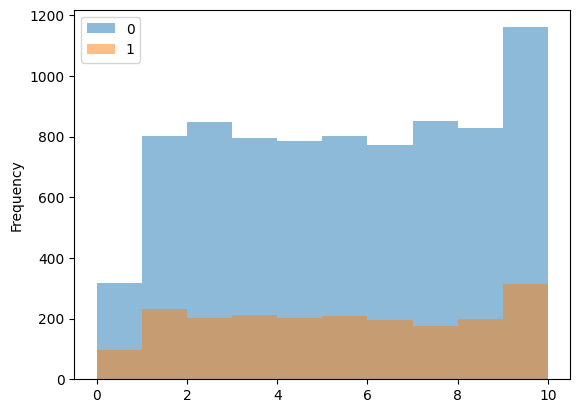

In [190]:
df.groupby('churn')['tenure'].plot.hist(alpha=0.5, legend=True)

In [191]:
tenure_summary = df.groupby('churn')['tenure'].describe()
print(tenure_summary)

        count      mean       std  min  25%  50%  75%   max
churn                                                      
0      7963.0  5.033279  2.880658  0.0  3.0  5.0  7.0  10.0
1      2037.0  4.932744  2.936106  0.0  2.0  5.0  8.0  10.0


1. Customer loyalty doesn't necessarily increase with tenure.
2. Long-term customers (10 years) show strong retention.
3. The similar mean tenure between churned and retained customers suggests that tenure alone isn't a strong predictor of churn.


##**Churn status based on number of products**

,products_number
churn,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


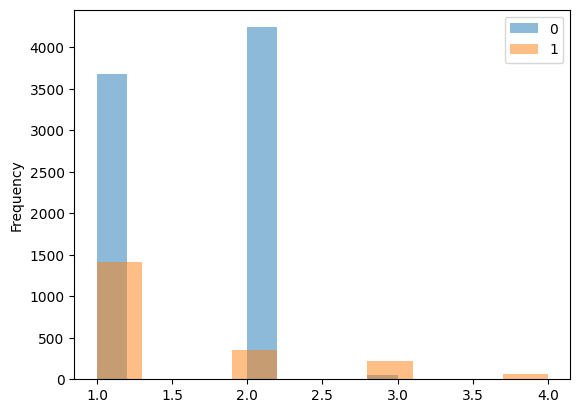

In [192]:
df.groupby('churn')['products_number'].plot.hist(alpha=0.5, legend=True)

In [193]:
product_summary = df.groupby('churn')['products_number'].describe()
print(product_summary)

        count      mean       std  min  25%  50%  75%  max
churn                                                     
0      7963.0  1.544267  0.509536  1.0  1.0  2.0  2.0  3.0
1      2037.0  1.475209  0.801521  1.0  1.0  1.0  2.0  4.0


1. Having 2 products appears to be associated with better retention
2. Single-product customers show higher vulnerability to churn.
3. Bank ABC could analyze which product combinations show the best retention rates.
4. Consider loyalty benefits tied to multiple product ownership.
5. Create bundling strategies for complementary products.

##**Churn status based on account balance**

,balance
churn,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


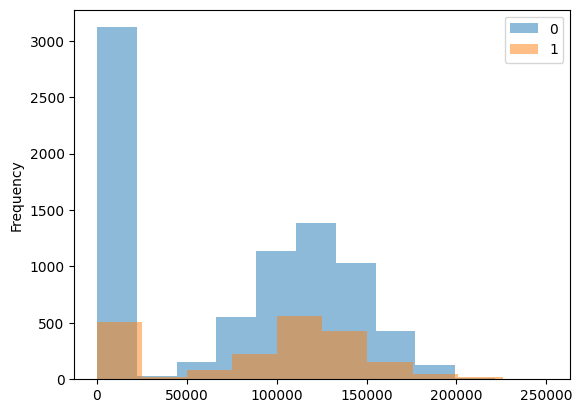

In [194]:
df.groupby('churn')['balance'].plot.hist(alpha=0.5, legend=True)

In [195]:
balance_summary = df.groupby('churn')['balance'].describe()
print(balance_summary)

        count          mean           std  min       25%        50%  \
churn                                                                 
0      7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1      2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

             75%        max  
churn                        
0      126410.28  221532.80  
1      131433.33  250898.09  


1. Customers with higher balances appear more likely to churn.
2. Very low balance accounts form a large segment of the customer base.
3. Bank ABC could develop premium services or benefits for high-balance customers.


##**Churn status based on credit card**

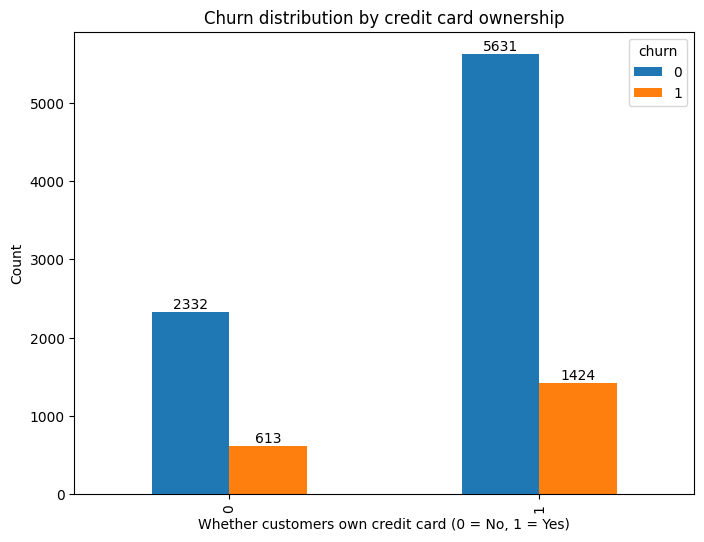

In [196]:
churn_card = df.groupby(["credit_card"])["churn"].value_counts().unstack()

churn_card.plot(kind='bar', figsize=(8, 6))
plt.title('Churn distribution by credit card ownership')
plt.xlabel('Whether customers own credit card (0 = No, 1 = Yes)')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

1. The similar churn rates suggest that credit card benefits might not be creating significant "stickiness".
2. Investigate whether specific credit card features or rewards correlate with retention.
3. Evaluate whether combining credit cards with other products improves retention.
4. Look into whether credit card usage patterns (not just ownership) affect churn.

##**Churn status based on membership**

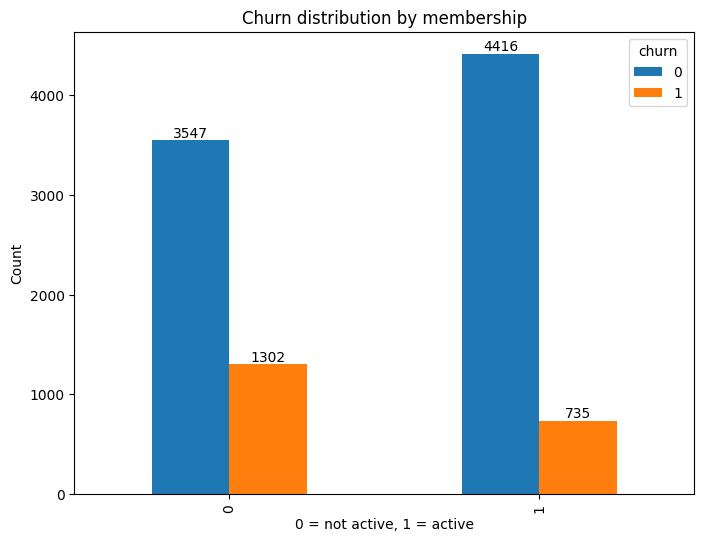

In [197]:
churn_membership = df.groupby(["active_member"])["churn"].value_counts().unstack()

churn_membership.plot(kind='bar', figsize=(8, 6))
plt.title('Churn distribution by membership')
plt.xlabel('0 = not active, 1 = active')
plt.ylabel('Count')

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

1. Inactive members are nearly twice as likely to churn (26.9% vs. 14.3% churn rate).
2. Active membership status appears to be a strong predictor of retention.
3. Inactive status could be an early warning sign for churn risk.
4. Activating inactive customers could significantly improve retention.
5. Review and enhance membership benefits to encourage active status.
6. Implement early warning system based on activity levels
7. Analyze what characterizes the inactive customers who don't churn to learn from their retention.


##**Churn status based on salary**

,estimated_salary
churn,
0,"Axes(0.125,0.11;0.775x0.77)"
1,"Axes(0.125,0.11;0.775x0.77)"


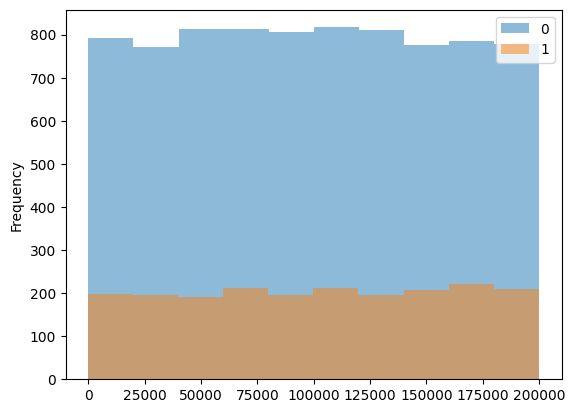

In [198]:
df.groupby('churn')['estimated_salary'].plot.hist(alpha=0.5, legend=True)

In [199]:
salary_summary = df.groupby('churn')['estimated_salary'].describe()
print(salary_summary)

        count           mean           std    min       25%        50%  \
churn                                                                    
0      7963.0   99738.391772  57405.586966  90.07  50783.49   99645.04   
1      2037.0  101465.677531  57912.418071  11.58  51907.72  102460.84   

              75%        max  
churn                         
0      148609.955  199992.48  
1      152422.910  199808.10  




1. Customers who churn and those who stay have overlapping salary ranges, and their means and medians are close, indicating estimated salary may not be a strong predictor of churn on its own.
2. Since churn occurs evenly across all salary brackets, targeting specific salary groups for churn reduction campaigns may not yield effective results.



## **Feature engineering**



From EDA above, features that affect churns are: gender, country, age, number of products, account balance, and whether their membership are active or not.

In [200]:
y = df['churn']
X = df[['gender', 'country', 'age', 'products_number', 'balance', 'active_member']]

In [201]:
y.head()

,churn
0,1
1,0
2,1
3,0
4,0


We need to turn the categorical levels into numerical values for modelling.

In [202]:
X.loc[:, "gender"] = X["gender"].map({"Female": 0, "Male": 1})
X.loc[:, "country"] = X["country"].map({"France": 0, "Germany": 1, "Spain": 2})

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)


We are going to scale the X.

In [204]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Now we are going to extract the scaler.

In [205]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [206]:
X_test = scaler.transform(X_test)

## **Classification models**

In [207]:
from sklearn.metrics import classification_report
def print_classification_report(y_test, y_pred):
    print(classification_report(y_test, y_pred))


### **Logistic regression**

In [208]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [209]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [210]:
X.head()

,gender,country,age,products_number,balance,active_member
0,0,0,42,1,0.00,1
1,0,2,41,1,83807.86,1
2,0,0,42,3,159660.80,0
3,0,0,39,2,0.00,0
4,0,2,43,1,125510.82,1


In [211]:
y_pred = log_model.predict(X_test)

In [212]:
print_classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2404
           1       0.57      0.19      0.28       596

    accuracy                           0.81      3000
   macro avg       0.70      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



### **K Nearest Neighbors**

In [213]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {"n_neighbors": [3, 5, 7, 9, 11], "weights" : ["uniform", "distance"]}
knn_model = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [214]:
knn_model.best_params_

{'n_neighbors': 11, 'weights': 'uniform'}

In [215]:
y_pred_knn = knn_model.predict(X_test)

In [216]:
print_classification_report(y_test, y_pred_knn)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2404
           1       0.71      0.46      0.56       596

    accuracy                           0.86      3000
   macro avg       0.80      0.71      0.74      3000
weighted avg       0.84      0.86      0.84      3000



### **Support Vector Machine**

In [217]:
from sklearn.svm import SVC
param_grid = {"C": [0.01, 0.1, 1], "kernel": ["linear", "rbf", "poly"]}
svm_model = GridSearchCV(SVC(), param_grid, cv=5)

In [218]:
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [219]:
svm_model.best_params_

{'C': 1, 'kernel': 'rbf'}

In [220]:
y_pred_svm = svm_model.predict(X_test)

In [221]:
print_classification_report(y_test, y_pred_svm)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      2404
           1       0.77      0.36      0.49       596

    accuracy                           0.85      3000
   macro avg       0.81      0.67      0.70      3000
weighted avg       0.84      0.85      0.83      3000



### **Decision Tree**

In [223]:
from sklearn.tree import DecisionTreeClassifier

In [224]:
param_grid = {"criterion" : ["gini", "entropy"],
              "max_depth": [10, 20, 30],
              "splitter": ["best", "random"],
              "min_samples_split" : [2,5,10],
              "min_samples_leaf" : [1,2,4]}
dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

In [225]:
dt_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [226]:
dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'splitter': 'random'}

In [228]:
y_pred_dt = dt_model.predict(X_test)

In [229]:
print_classification_report(y_test, y_pred_dt)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      2404
           1       0.67      0.45      0.54       596

    accuracy                           0.85      3000
   macro avg       0.77      0.70      0.72      3000
weighted avg       0.83      0.85      0.84      3000



### **Random forest**

In [230]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
param_grid = {"n_estimators": [32, 64, 128],
              "max_features": [2,3,4],
              "bootstrap": [True, False]}

In [231]:
rf_model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)

In [232]:
rf_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 128]})

In [233]:
rf_model.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 128}

In [234]:
y_pred_rf = rf_model.predict(X_test)

In [235]:
print_classification_report(y_test, y_pred_rf)

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2404
           1       0.64      0.51      0.57       596

    accuracy                           0.85      3000
   macro avg       0.76      0.72      0.74      3000
weighted avg       0.84      0.85      0.84      3000



### **Best model**

All models give poor precision and recall for class 1 ('churn'). For the sake of our project, we are going to just choose a model with highest accuracy as the best model.

The best model among all models above is KNN.

In [238]:
best_model = knn_model.best_estimator_

We are going to export this model and save it as model.pkl.

In [239]:
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [240]:
X.columns

Index(['gender', 'country', 'age', 'products_number', 'balance',
       'active_member'],
      dtype='object')

In [ ]:
#For streamlit:
#Gender: 1 = Male, 0 = Female
#Country: 0 = France, 1 = Germany, 2 = Spain
#Churn: 1 = Yes, 0 = No
#Scaler is exported as scaler.pkl
#Model is exported as model.pkl
#Order of X: 'gender', 'country', 'age', 'products_number', 'balance', 'active_member'
